In [105]:
import matplotlib.pyplot as plt
from numpy.random import choice
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(561)

## Đọc file dữ liệu

In [106]:
dataset = pd.read_csv("./Unicorn_Companies.csv")

In [ ]:
dataset.head()

### Số record

In [108]:
len(dataset)

1037

### Các cột của dataset

In [133]:
list(dataset)

['Company',
 'Valuation ($B)',
 'Date Joined',
 'Country',
 'City',
 'Industry',
 'Select Inverstors',
 'Founded Year',
 'Total Raised',
 'Financial Stage',
 'Investors Count',
 'Deal Terms',
 'Portfolio Exits',
 'Total Raised ($B)']

## Làm sạch dữ liệu

In [110]:
def format_total_raised(t_r):
    """
    Hàm format lại Total_Raised về dạng Billion
    t_r : tổng giá trị tăng trưởng ở dạng $xB hoặc $xM
    """
    if t_r == "None":
        return 0
    num = t_r[1:-1]
    post = t_r[-1]
    if post == "B":
        return float(num)
    else:
        return float(num)/1000

In [111]:
dataset["Valuation ($B)"] = dataset["Valuation ($B)"].apply(lambda v:float(v[1:]))
dataset["Total Raised ($B)"] = dataset["Total Raised"].apply(lambda r:format_total_raised(r))

## Phương pháp lấy mẫu Bootstrap

In [131]:
def Bootstrap_Statistic(n,M,x):
    """
    n : kích thước mẫu
    M : số lần lấy mẫu bootstrap
    x : khoảng tin cậy
    """
    # Mảng 2 chiều chứa M mẫu kích thước n
    sample = np.array([np.zeros(n)]*M)
    # Mảng chứa M giá trị trung bình
    sample_mean = np.zeros(M)
    for i in range(M):
        # Chọn ra ngẫu nhiên n mẫu
        sample[i] = choice(dataset["Valuation ($B)"], size=n)
        sample_mean[i] = np.mean(sample[i])

    # print(sample.shape, sample)
    # print(sample_mean.shape, sample_mean)

    # Đồ thị histogram
    sns.histplot(data=sample_mean)
    # sns.kdeplot(data = sample_mean)

    # Mức ý nghĩa
    alpha = (100-x)/2
    # Sắp xếp sample_mean tăng dần
    sample_mean_asc = np.sort(sample_mean)
    # 2 biên khoảng tin cậy
    lower_bound = sample_mean_asc[int(alpha/100*M)]
    upper_bound = sample_mean_asc[int((1-alpha/100)*M)]
    print(">> Khoang tin cay : ",lower_bound," - ",upper_bound)
    plt.axvline(lower_bound, color="red", linewidth=2)
    plt.axvline(upper_bound, color="red", linewidth=2)


(100, 350) [[ 1.2   1.2   1.4  ...  6.   17.5   3.7 ]
 [ 1.5   1.2   1.17 ...  3.5   1.1   4.6 ]
 [ 5.    3.    1.5  ...  8.4   4.5   4.  ]
 ...
 [ 1.    1.    1.   ...  1.    1.15  3.92]
 [ 3.5   3.7   5.   ...  1.3   1.1   9.6 ]
 [ 1.6   1.5   1.   ...  2.2   5.2   3.5 ]]
(100,) [3.25194286 3.52488571 3.15505714 3.51931429 3.11468571 3.29031429
 3.90991429 2.99954286 3.57325714 3.38382857 3.59411429 2.81854286
 2.86582857 3.58254286 2.77094286 3.10214286 2.60042857 3.77028571
 3.31125714 3.42865714 3.09342857 3.05025714 2.67965714 3.79834286
 3.52645714 3.93717143 3.00757143 3.41411429 3.34191429 3.87974286
 3.10448571 2.81754286 2.91697143 2.9232     2.81542857 3.60148571
 3.4166     2.78637143 3.29177143 3.6934     3.3188     2.87442857
 3.36568571 3.358      2.80602857 4.1036     2.98365714 3.43148571
 3.62131429 3.47577143 3.5298     2.79294286 3.00728571 2.92465714
 3.2932     3.14711429 2.95754286 2.73082857 4.29997143 3.93645714
 3.46657143 4.37385714 3.35882857 3.78454286 3.2

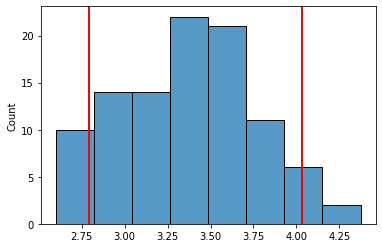

In [130]:
Bootstrap_Statistic(350, 100, 90)